## Importing the Important Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
import statistics
import os

pd.set_option("display.max_columns", 100)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import (train_test_split, StratifiedKFold, KFold)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



from sklearn.model_selection import (train_test_split, StratifiedKFold, KFold)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import AgglomerativeClustering

#### Importing the dataset

In [ ]:
df = pd.read_csv(
    r"C:\Users\khush\Python, 12-7\Practice\Projects\Customer_segment_project_ete\notebooks\data\marketing_campaign.csv", sep = '\t'
)

In [62]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

## Attributes

People

1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

Promotion

1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month

Target
Need to perform clustering to summarize customer segments.

In [5]:
## Find correlation between Promotional columns

## 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response'

<Axes: >

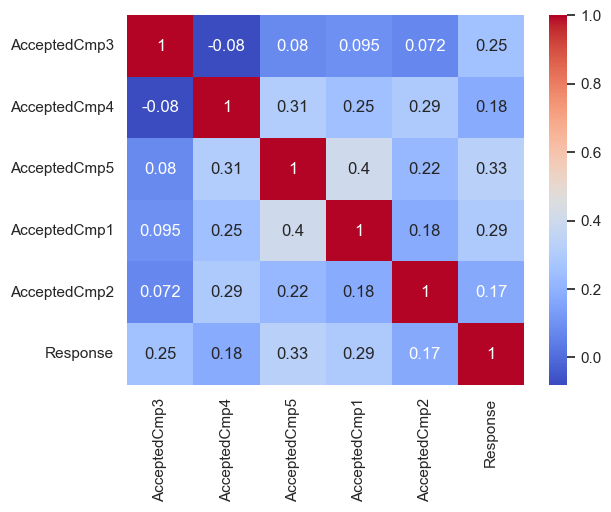

In [6]:
Promotionnal_data = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']]
corr = Promotionnal_data.corr()
sns.heatmap(corr, annot = True,cmap= 'coolwarm')

###  --------------------------------------------------------------------------  No correlated column

In [7]:
Promotionnal_data

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
2235,0,0,0,0,0,0
2236,0,0,0,1,0,0
2237,0,1,0,0,0,0
2238,0,0,0,0,0,0


<Axes: >

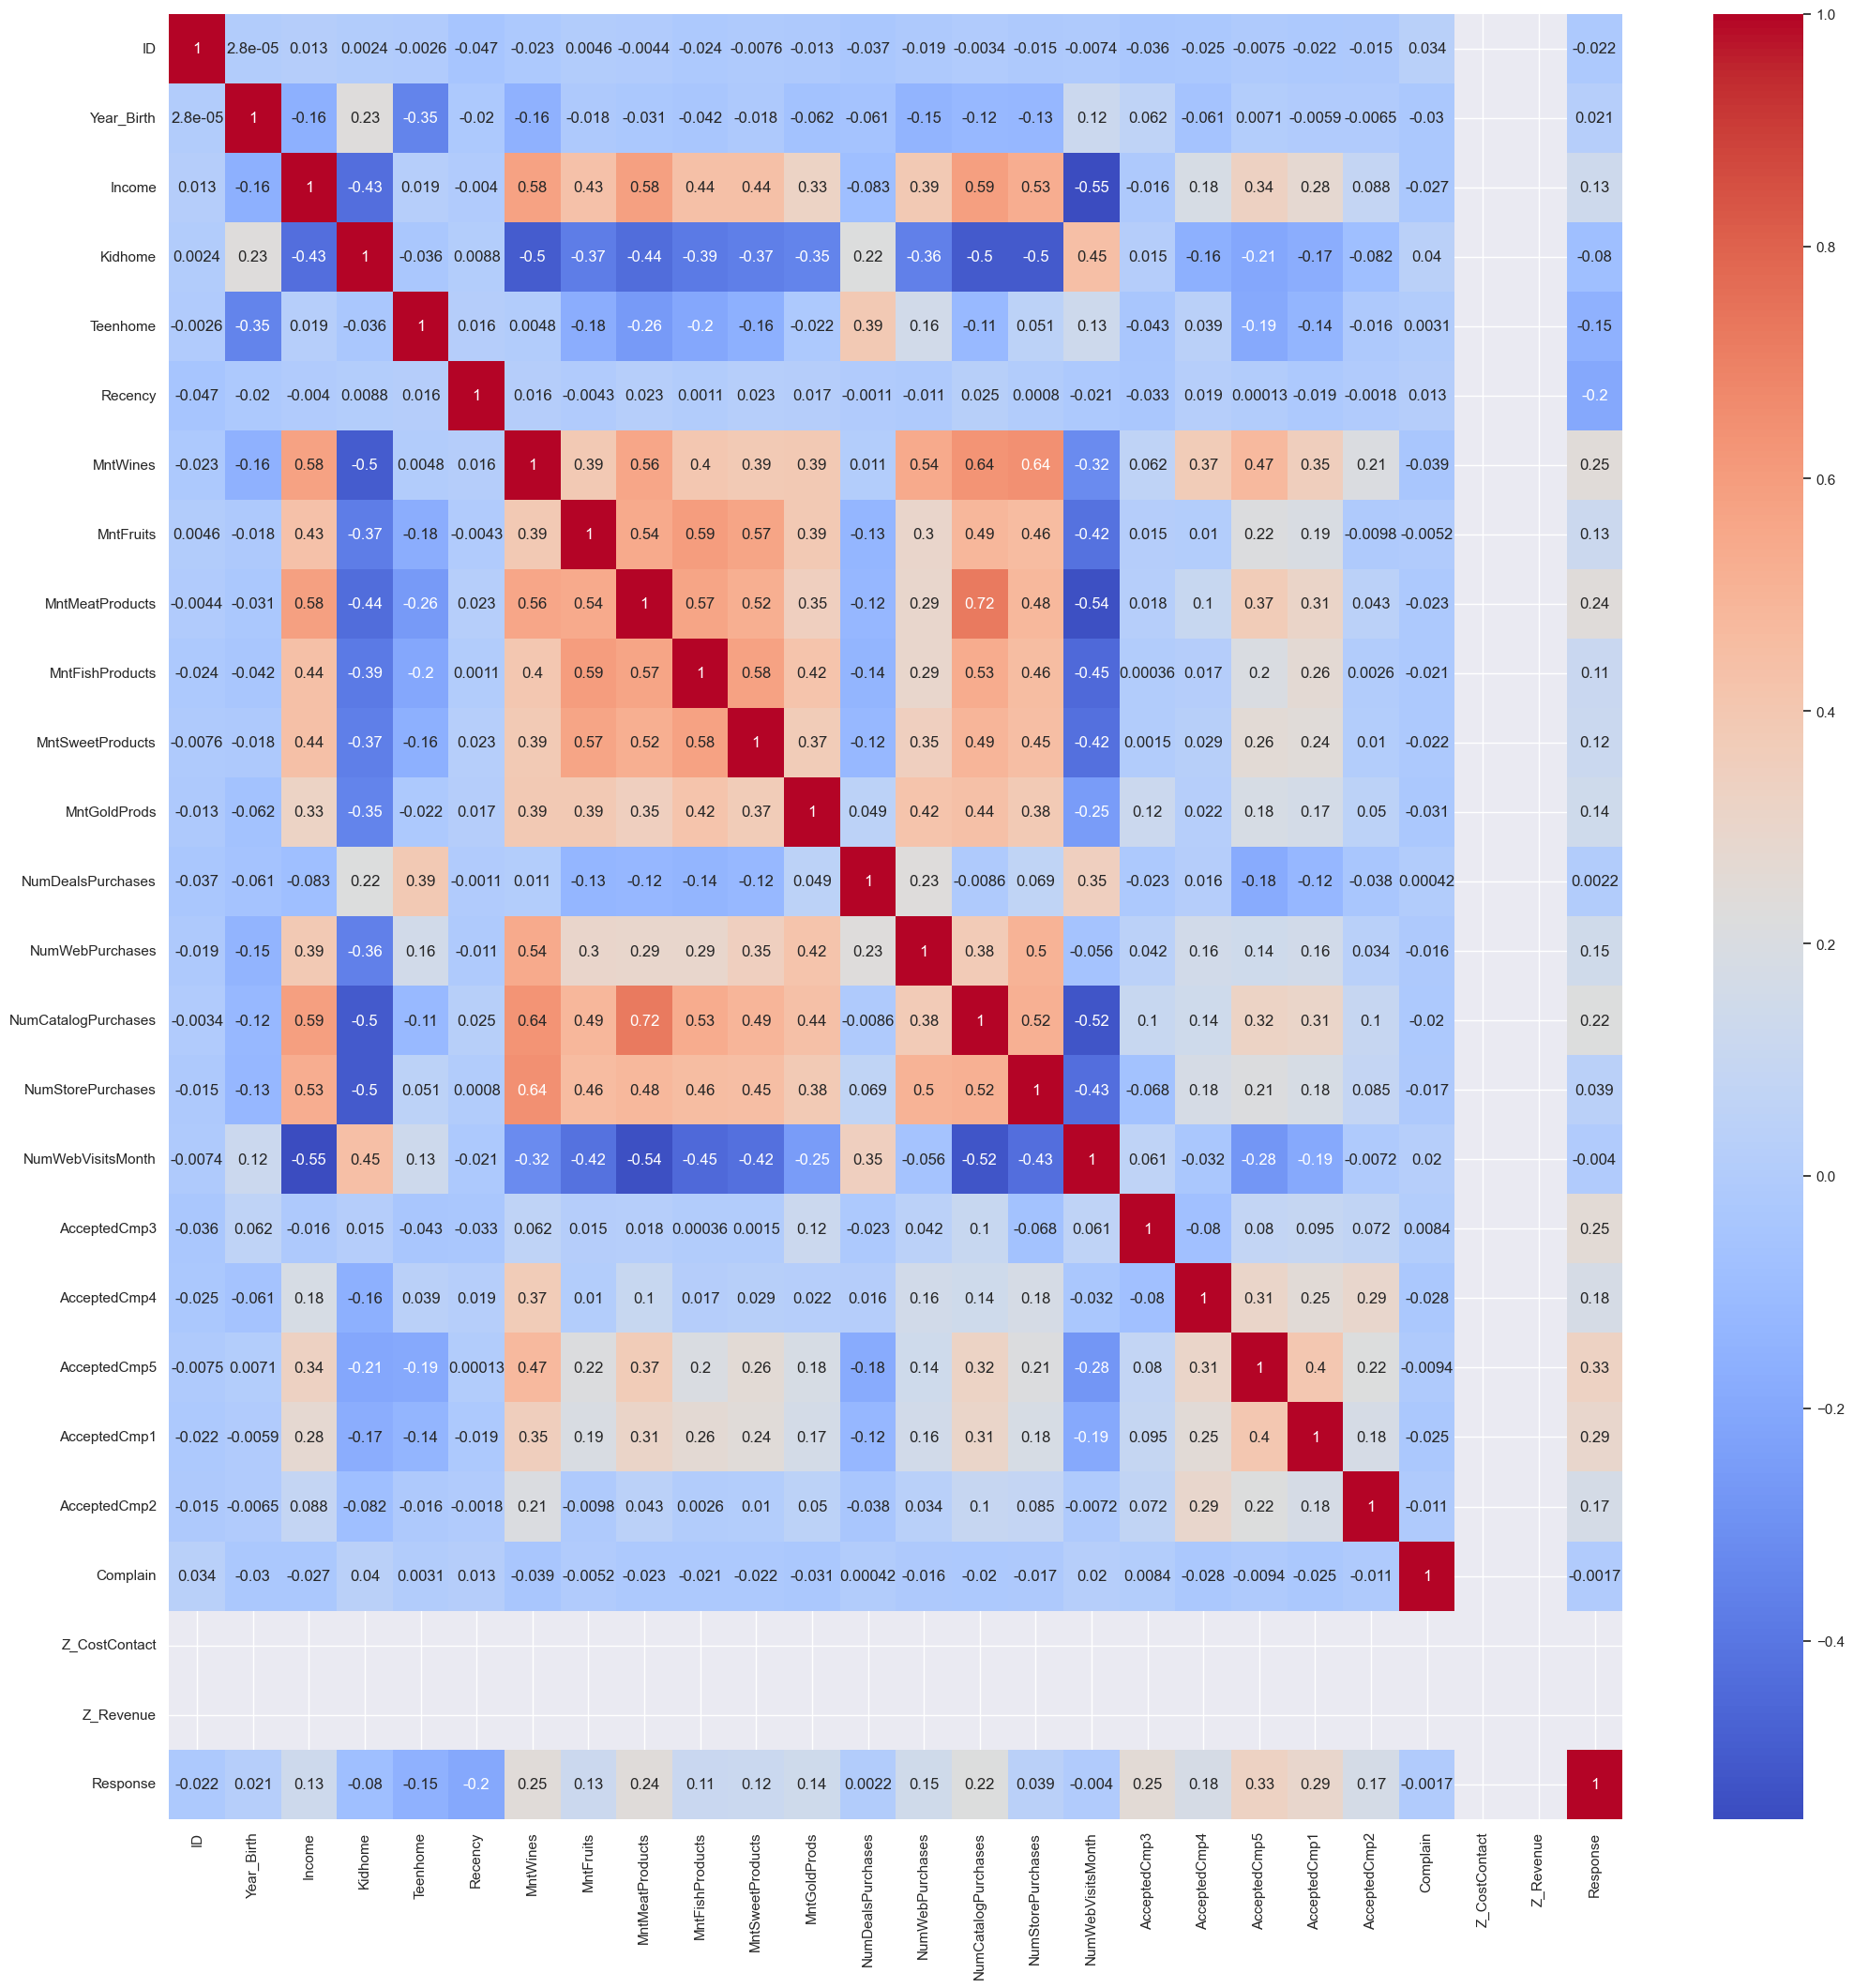

In [8]:
plt.figure(figsize = (25,25))
sns.heatmap(df.select_dtypes(exclude = 'object').corr(), annot = True,cmap= 'coolwarm')

In [9]:
correlation_df = df.select_dtypes(exclude = 'object').corr()


In [10]:
correlation_df[correlation_df > 0.50].sum()

ID                     1.000000
Year_Birth             1.000000
Income                 3.281808
Kidhome                1.000000
Teenhome               1.000000
Recency                1.000000
MntWines               3.960907
MntFruits              2.705072
MntMeatProducts        4.506479
MntFishProducts        3.277554
MntSweetProducts       2.670880
MntGoldProds           1.000000
NumDealsPurchases      1.000000
NumWebPurchases        2.044978
NumCatalogPurchases    4.001431
NumStorePurchases      3.192914
NumWebVisitsMonth      1.000000
AcceptedCmp3           1.000000
AcceptedCmp4           1.000000
AcceptedCmp5           1.000000
AcceptedCmp1           1.000000
AcceptedCmp2           1.000000
Complain               1.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               1.000000
dtype: float64

### Null Values Detected

In [11]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


### Duplicate Values check

In [12]:
df.duplicated().sum()

0

In [13]:
# No duplicate values detected

In [14]:
df.shape

(2240, 29)

### Since we dont know the defination of these 2 columns, lets check them :-- "Z_CostContact", "Z_Revenue"

In [15]:
print(df['Z_CostContact'].value_counts())
print()
print(df['Z_Revenue'].value_counts())

Z_CostContact
3    2240
Name: count, dtype: int64

Z_Revenue
11    2240
Name: count, dtype: int64


In [16]:
# We will drop these columns in future

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
# Married, Together    -- Couples
# Single, Alone, Absurd, YOLO, Widow, Divorced -- Single
# Widow --> Since Widows are more likely to be Single
# Divorcee --> Since 10-15% of couples reconcile after they separate (Google data)




In [19]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [20]:
# High School --> '2n Cycle', 'Basic'
# Bachelors --> 'Graduation'
# Higher Education - 'PhD', 'Master'

In [21]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [22]:
df['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [23]:
df['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

<Axes: >

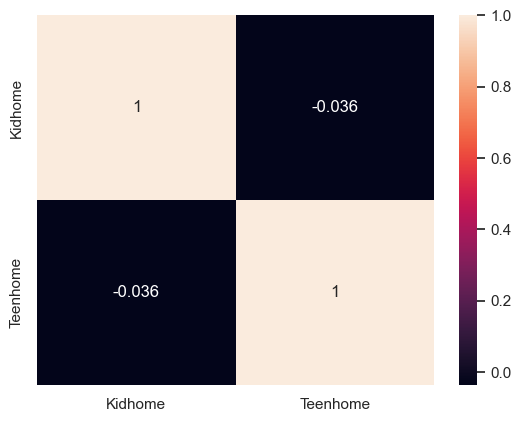

In [24]:
sns.heatmap(df[['Kidhome', 'Teenhome']].corr(),annot= True)

In [25]:
# No correlation but they mean the same, whether that person have children or not
# Will add them and merge into one column

In [26]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [27]:
# Amount Spent - 'MntWines'+ 'MntFruits'+'MntMeatProducts'+ 'MntFishProducts'+ 'MntSweetProducts'+ 'MntGoldProds'

<Axes: >

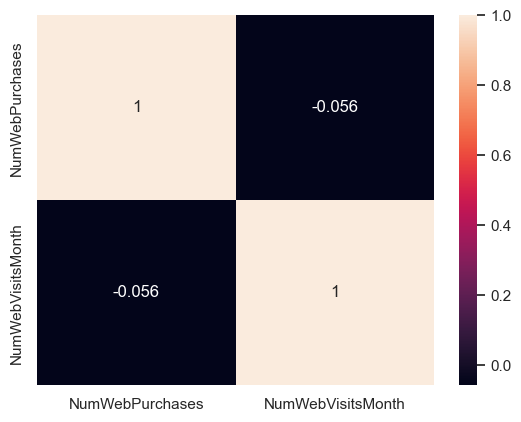

In [28]:
sns.heatmap(df[['NumWebPurchases', 'NumWebVisitsMonth']].corr(),annot = True)

In [29]:
(df['Complain'].value_counts()/df.shape[0])*100

Complain
0    99.0625
1     0.9375
Name: count, dtype: float64

#### Preprocessing
1. Income -- Impute null values with the mean
2. Dt_Customer -- to_datetime -- convert to months
3. Z_CostContact, Z_Revenue - same values - DROP
4. Drop columns - ID, Z_CostContact, 		Z_Revenue, Complain
5. Marital_Status -->
		Married, Together    -- Couples
		Single, Alone, Absurd, YOLO, 				Widow, Divorced -- Single

6. Education -->
		High School --> '2n Cycle', 				'Basic'
		Bachelors --> 'Graduation'
		Higher Education - 'PhD', 'Master'

7. Kidhome, Teenhome -- 
		df['Child'] = 'Kidhome' + 		'Teenhome'

8. Amount Spent = 			'MntWines'+'MntFruits'+'MntMeatProducts'+ 		'MntFishProducts'+ 'MntSweetProducts'+ 			'MntGoldProds'
9. Total Purchases - NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases
10. Target - AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response
11. Year_Birth - Fing Age








In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

In [32]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

## Building Pipeline

In [63]:
df = pd.read_csv(
    r"C:\Users\khush\Python, 12-7\Practice\Projects\Customer_segment_project_ete\artifects_segmentation\raw data.csv")
#df2 = df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'])
#df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
df2 = df.copy(deep = True)

# Dt_Customer_Transform
def Preprocessor_transformer(dataset):
    
    dataset = dataset.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue','Complain'])
    dataset['Income'] = dataset['Income'].fillna(df['Income'].median())
    
    dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'],format='%d-%M-%Y')
    max_date = max(dataset['Dt_Customer'])
    l1 = (max_date - dataset['Dt_Customer']).dt.days
    dataset['Dt_Customer'] = l1
    
    #Marriage
    status_update = {'Married' : "Couple", "Together" : "Couple",
                    "Alone" : "Single", "Absurd" : "Single", "YOLO": "Single", "Widow": "Single","Divorced" : "Single","Single":"Single"}

    dataset['Marital_Status'] = dataset['Marital_Status'].map(status_update)
    encoder_map = {"Couple":1, "Single" : 0}
    dataset['Marital_Status'] = dataset['Marital_Status'].map(encoder_map)
    
    # Education

    education_map = {"2n Cycle" : "High School", 'Basic' : "High School",
                     'Graduation' : "Bachelors",
                     'PhD': "Higher Education", "Master": "Higher Education"}
    
    dataset['Education'] = dataset['Education'].map(education_map)
    encoder_map = {"High School": 0, "Bachelors" : 1, "Higher Education" :2}
    dataset['Education'] = dataset['Education'].map(encoder_map)
    
    

    # kid_teenhome_combine
    
    dataset['childornot'] = dataset['Kidhome'] + dataset['Teenhome']
    dataset = dataset.drop(columns = ['Kidhome', 'Teenhome'])

    # Amount Spent
    dataset['Amount spend'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] +dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']
    dataset = dataset.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
    
    # Total Purchases
    dataset['total_num_purchases'] = dataset['NumDealsPurchases'] + dataset['NumWebPurchases'] + dataset['NumCatalogPurchases'] + dataset['NumStorePurchases']
    dataset = dataset.drop(columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])
    
    # Find age from Year_Birth 

    current_year = 2023
    dataset['Year_Birth'] = current_year - dataset['Year_Birth'] 
    
    #Normalize

    

    #dataset = normalize(dataset)
    
    
    
    return dataset


def targetvalues_transform(dataset):
    dataset['Final_Response'] = dataset['AcceptedCmp1'] + dataset['AcceptedCmp2'] + dataset['AcceptedCmp3'] + dataset['AcceptedCmp4'] + dataset['AcceptedCmp5'] + dataset['Response']
    dataset['Final_Response'] = dataset['Final_Response'].apply(lambda x : 1 if x >= 1 else 0)
    dataset = dataset.drop(columns = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response'])
    return dataset
    




columns_for_SMOTE = ['Age', 'Income', 'Education', 'Total_Purchases']


transformed_cols = ['Dt_Customer','Marital_Status','Education', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Year_Birth',
                   
                    'ID', 'Z_CostContact', 'Z_Revenue','Complain','Recency','NumWebVisitsMonth','Income']
target_cols = ['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']

transformer = ColumnTransformer([
    
    ("Preprocessor_transformer", FunctionTransformer(Preprocessor_transformer), transformed_cols) ,
    ("targetvalues_transform", FunctionTransformer(targetvalues_transform), target_cols),
    
    
],remainder= 'passthrough')

cols = ['Income','Dt_Customer', 'Marital_Status', 'Education', 'Year_birth__Age',
        'Childornot' ,'Amount spend' ,'total_num_purchases' ,'Final_Response' ,'Recency'  ,'NumWebVisitsMonth' ]
preprocessed_columns = ['Dt_Customer','Marital_Status', 'Education', 'Current_Age',
                                    'Recency', 'NumWebVisitsMonth', 'Income', 'childornot',
                                    'total_amt_spent', 'totalnum_purchases','Target']
final_output = transformer.fit_transform(df2)
df_2 = pd.DataFrame(final_output,columns = preprocessed_columns)
df_2

,Dt_Customer,Marital_Status,Education,Current_Age,Recency,NumWebVisitsMonth,Income,childornot,total_amt_spent,totalnum_purchases,Target
0,757.0,0.0,1.0,66.0,58.0,7.0,58138.0,0.0,1617.0,25.0,1.0
1,23.0,0.0,1.0,69.0,38.0,5.0,46344.0,2.0,27.0,6.0,0.0
2,374.0,1.0,1.0,58.0,26.0,4.0,71613.0,0.0,776.0,21.0,0.0
3,21.0,1.0,1.0,39.0,26.0,6.0,26646.0,1.0,53.0,8.0,0.0
4,12.0,1.0,2.0,42.0,94.0,5.0,58293.0,1.0,422.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2235,382.0,1.0,1.0,56.0,46.0,5.0,61223.0,1.0,1341.0,18.0,0.0
2236,20.0,1.0,2.0,77.0,56.0,7.0,64014.0,3.0,444.0,22.0,1.0
2237,6.0,0.0,1.0,42.0,91.0,6.0,56981.0,0.0,1241.0,19.0,1.0
2238,7.0,1.0,2.0,67.0,8.0,3.0,69245.0,1.0,843.0,23.0,0.0


In [41]:
x = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1]

## Model Training

In [42]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.25,random_state= 8)

## Base Estimator

In [64]:
accuracy_score(yTest,np.zeros_like(yTest))

0.5076687116564417

### KFold

In [69]:
resampler = SMOTE()

#x_resam,y_resam = resampler.fit_resample(x,y)
x = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1]
kfold = StratifiedKFold(n_splits=10, shuffle = True)
fold = 1
list_recall = []
list_auc = []
for index1, index2 in kfold.split(x,y):
    xTrain = x.loc[index1]
    yTrain = y.loc[index1]
    
    xTest = x.loc[index2]
    yTest = y.loc[index2]
    
    xTrain,yTrain = resampler.fit_resample(xTrain,yTrain)
    rf = DecisionTreeClassifier()
    model = rf.fit(xTrain,yTrain)
    
    pred = model.predict(xTest)
    pred_prob = model.predict_proba(xTest)[:,1]
    
    recallscore_rs = recall_score(yTest,pred)
    auc_score = roc_auc_score(yTest, pred_prob)
    acc_score = accuracy_score(yTest,pred)
    list_recall.append(recallscore_rs)
    list_auc.append(auc_score)
    print(f"=====Fold {fold} =====")
    print(f"Accuracy Score : {acc_score}")
    print(f'Recall Score: {recallscore_rs}')
    print(f"AUC score: {auc_score}")
    
    

    fold +=1
print("**"*10)
print("**"*10)
print("**"*10)
print(f"Average Recall Score is {statistics.mean(list_recall)}")
print(f"Average AUC Score is {statistics.mean(list_auc)}")

=====Fold 1 =====
Accuracy Score : 0.7544642857142857
Recall Score: 0.6065573770491803
AUC score: 0.710047269435784
=====Fold 2 =====
Accuracy Score : 0.6875
Recall Score: 0.6065573770491803
AUC score: 0.6621743940460627
=====Fold 3 =====
Accuracy Score : 0.7098214285714286
Recall Score: 0.4918032786885246
AUC score: 0.6480941365784975
=====Fold 4 =====
Accuracy Score : 0.7455357142857143
Recall Score: 0.5737704918032787
AUC score: 0.690485768882631
=====Fold 5 =====
Accuracy Score : 0.7410714285714286
Recall Score: 0.5737704918032787
AUC score: 0.6878708639243689
=====Fold 6 =====
Accuracy Score : 0.7455357142857143
Recall Score: 0.6065573770491803
AUC score: 0.7020516946595595
=====Fold 7 =====
Accuracy Score : 0.7098214285714286
Recall Score: 0.47540983606557374
AUC score: 0.6364779241677562
=====Fold 8 =====
Accuracy Score : 0.7053571428571429
Recall Score: 0.5081967213114754
AUC score: 0.6470381172684302
=====Fold 9 =====
Accuracy Score : 0.7589285714285714
Recall Score: 0.6229508

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(xTrain, yTrain)
predict = model.predict(xTest)
score_recall = recall_score(predict,yTest)
report = classification_report(predict,yTest)
print(f"Recall score is {score_recall}")
print("******"*5)
print(f"Classification report is\n{report}")

Recall score is 0.6788321167883211
******************************
Classification report is
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       423
         1.0       0.57      0.68      0.62       137

    accuracy                           0.80       560
   macro avg       0.73      0.76      0.74       560
weighted avg       0.81      0.80      0.80       560



Text(0.5, 1.0, 'Feature Importance')

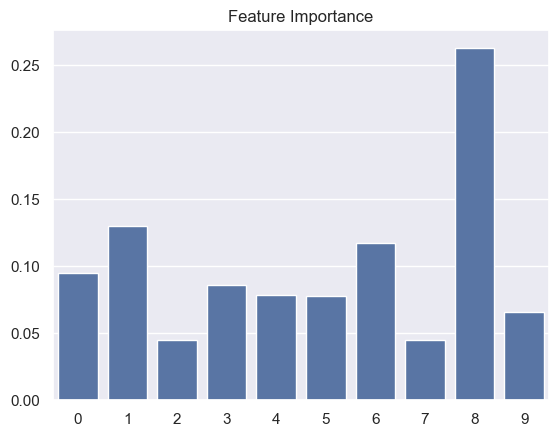

In [70]:
y_plot = model.feature_importances_.tolist()
x_plot = list(range(0,len(y_plot)))
sns.barplot(x = x_plot,y = y_plot)
plt.title("Feature Importance")

In [46]:
probs = model.predict_proba(xTest)[:, 1]
probs.shape

(560,)

In [47]:
xTest.shape

(560, 10)

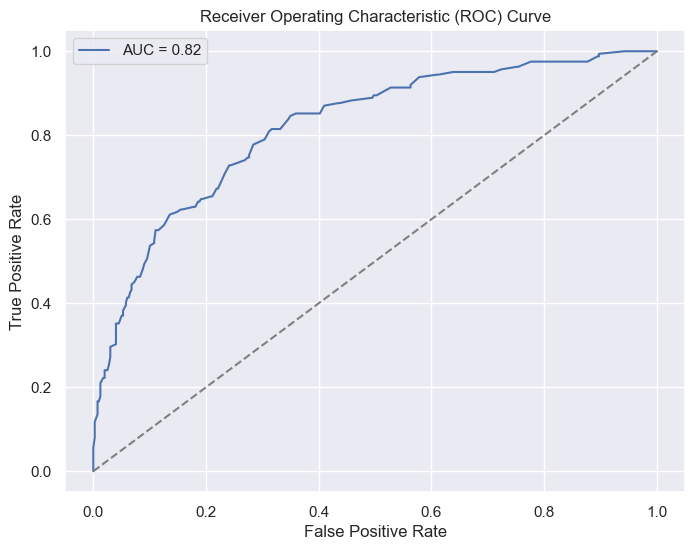

In [48]:
fpr, tpr, thresholds = roc_curve(yTest, probs)
auc = roc_auc_score(yTest, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Clustering

In [73]:
wcss = []
for i in range(1,15):
    kmean = KMeans(n_clusters = i,init = 'k-means++')
    kmean.fit(df_2)
    wcss.append(kmean.inertia_)

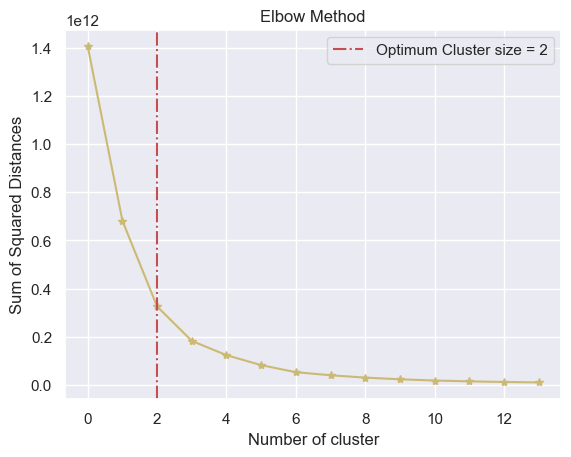

In [76]:
plt.plot(wcss,color = sns.color_palette()[-2],marker = "*")
plt.axvline(x=2, color='r', linestyle='-.', label='Optimum Cluster size = 2')
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Distances")
plt.legend()
plt.show()

### Analysis

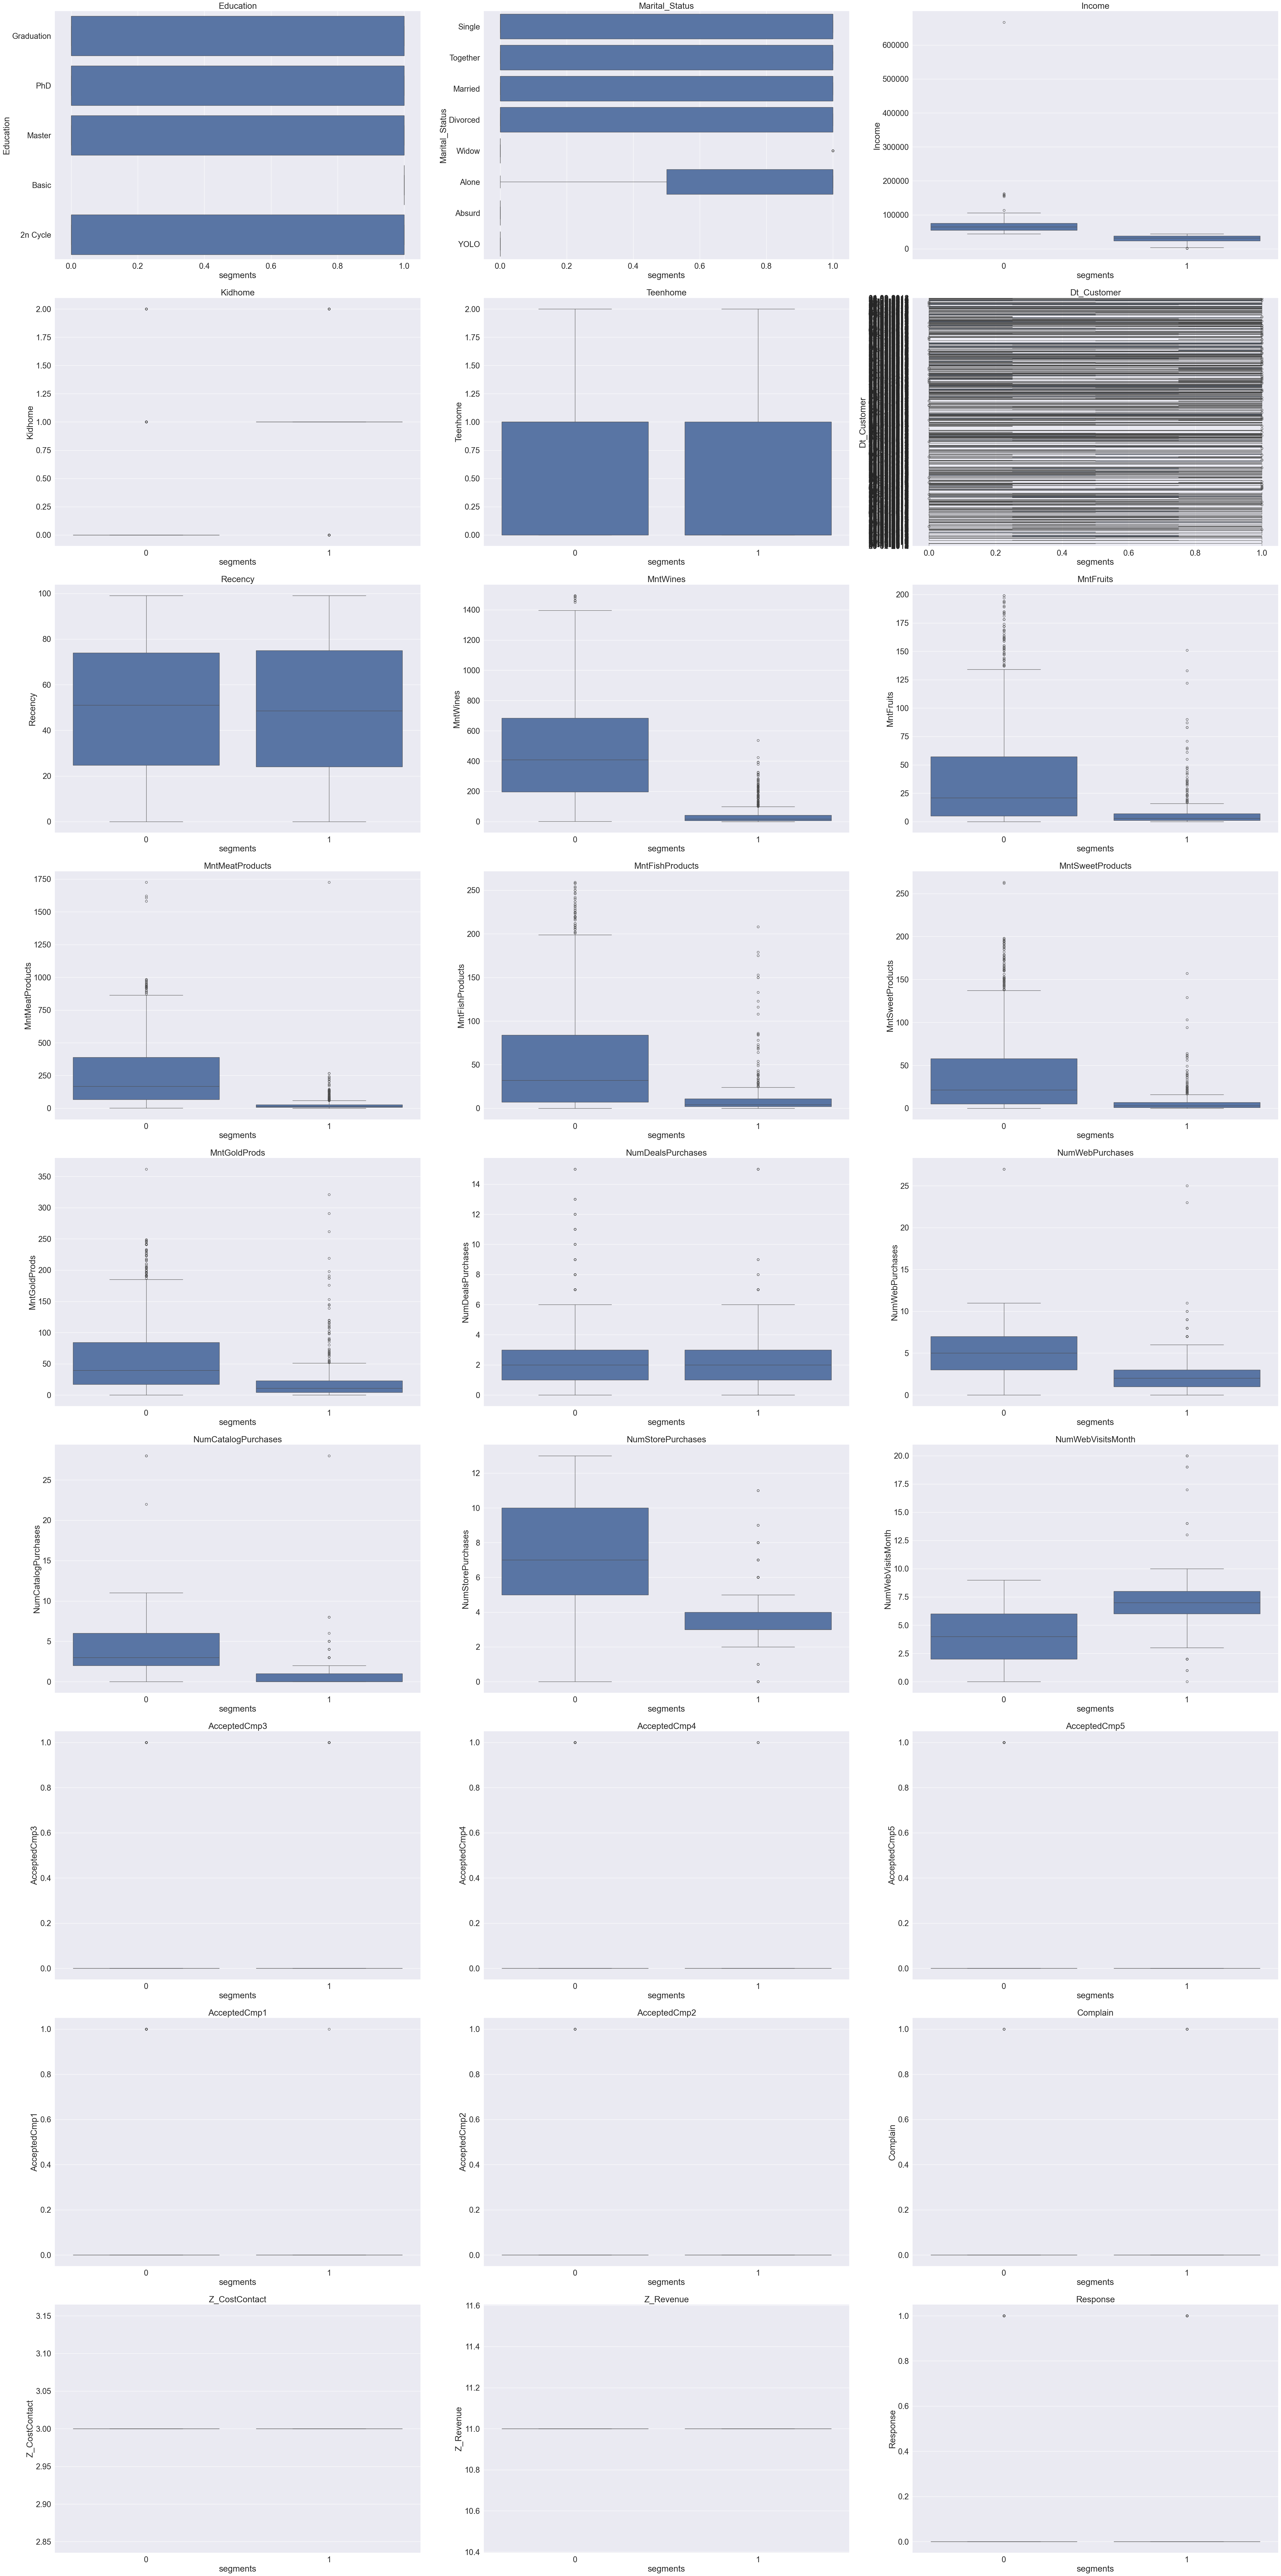

In [78]:
agg = AgglomerativeClustering(n_clusters = 2)
segments = agg.fit_predict(df_2)
df3 = df.copy(deep = True)
df3['segments'] = segments

num_rows = 9
num_columns = 3
sns.set(font_scale=2)
fig, axis = plt.subplots(num_rows, num_columns, figsize = (50,100))

axis = axis.flatten()

plot_columns = list(df3.drop(columns = ['segments',"ID",'Year_Birth']).columns)
for i, column in enumerate(plot_columns):
    sns.boxplot(x = df3['segments'], y = df3[column], ax = axis[i])
    axis[i].set_title(column)
plt.tight_layout()
plt.show()

### Since 0 segment have high income and high purchasing power hence 0 is our Good Customers and 1 is our Bad Customers
### 0 - Good Customers
### 1 - Bad Customers